## Tehtävä 1: Bellin pari

Tehtävän 1 tavoiteena on varmistaa että jokainen on saanut oman avaimen eli tokenin aktivoitua qiskit-palvelussa.

Tehtävä on nopea tehdä: suorita alla olevat koodilohkot järjestyksessä läpi.

Jos et ole vielä ottanut tokenia käyttöön, tee näin:

Rekisteröitymisen jälkeen liitä tokenisi [IBM Quantum Experiencen käyttäjäsivulta](https://quantum-computing.ibm.com/account) heittomerkkien sisään, ja aja koodi:

In [1]:
from qiskit import IBMQ
IBMQ.save_account("oma token tähän")

Credentials already present. Set overwrite=True to overwrite.


Token täytyy syöttää vain kerran, koska se tallennetaan kvanttilaskenta.net-käyttäjäsi tai oman tietokoneen käyttäjäsi yhteyteen.

**HUOM:** Ennen kuin palautat notebookin, ota tokenisi pois kentästä. Meidän ei tarvitse tietää sitä!

Alla on yksinkertaisen kvanttipiirin koodi, jotka käsittelimme jo kierroksen 2 laskuharjoituksissa. Rakenna, simuloi ja lähetä piiri lopuksi oikealle kvanttitietokoneelle laskettavaksi.

Voit halutessasi ohjelmoida piirin toteutuksen ja ajamisvaiheet itse seuraavan tutoriaalin avulla:

<a href="https://youtu.be/RrUTwq5jKM4" target="_blank">IBM:n "Hello World"-piirin tutoriaali</a>

In [ ]:
# Jos kirjoitat koodin itse, niin aloita tästä.
from qiskit import *


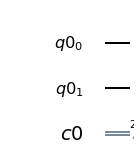

In [2]:
# Valmis esimerkkikoodi tehtävään 1 suoritettavaksi.
# Etene vaiheittain, suorita koodilohkot painamalla Run-nappia ylhäältä.

from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

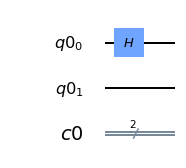

In [3]:
# Lisätään Hadamard-portti H 
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

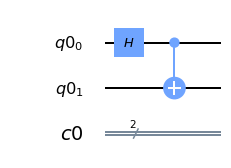

In [4]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')


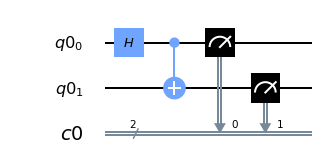

In [5]:
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

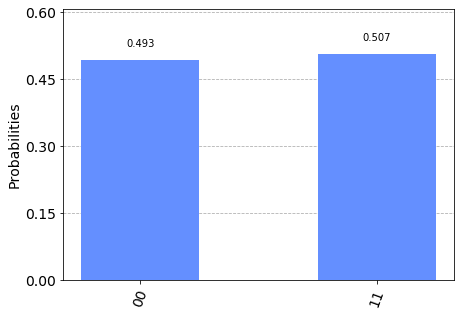

In [6]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [ ]:
# Lähetetään koodi oikealle kvanttikoneelle. Ole kärsivällinen, odota kvanttitietokoneen vastausta.
# Kun Jupyter odottaa vastausta, välilehden kuvakkeena näkyy tiimalasi..
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job) # Koodi jää odottamaan tähän, kun lähetys on jonossa ja käsiteltävänä

result = job.result()
plot_histogram(result.get_counts(circuit))

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Tehtävä 2
Tehtävässä kaksi tutustutaan yleiseen kvanttipiirin avulla toteutettuun kvanttitilan teleportaatioon.

### Quantum teleportation eli kvanttiteleportaatio
Kvanttiteleportaation avulla voidaan siirtää kubitin tila fyysisesti kauas tietyillä esivalmisteluilla. Kvanttiteleportaatio perustuu kubittien lomittumiseen, eli kubittien väliseen kytkentään kvanttisysteemissä.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teleportaatio.png" width="500">

Yllä ja ohjevideossa käsiteltävässä piirissä siirretään kubitin 0 tila kubitiin 2, paikasta A paikkaan B.

Ensin luodaan kubitin 1 ja 2 välille ns. Bellin pari eli lomitus Hadamard- ja CNOT-porttien avulla. Tämä pari luodaan esimerkiksi paikassa A, jonka jälkeen kubitti 2 siiretään fysisesti paikkaan B. 

Kun kubitin 0 tila halutaan siirtää kubitiin 2, niin paikassa A suoritetaan sarja operaatiota kubiteille 0 ja 1.  

Kubittien 0 ja 1 tilat mitatataan ja klassiset mittaustulokset lähetetään paikkaan B.

Mittaustuloksista riippuen paikassa B tehdään eri sarja operaatioita kubitille 2. Lopputuloksena kubitin 2 tila on sama kuin kubitin 0 alkuperäinen tila.


a) Katso tutoriaalivideo ja rakenna 3:n kubitin systeemi. Simuloi piirin toiminta.

Tutoriaalivideo:
<a href="https://youtu.be/mMwovHK2NrE" target="_blank">Kvanttiteleportaation qiskit-tutoriaali</a>

Videossa lähetetään ensin tila $\ket 1$ kubitista 0 kubittiin 2. Tämä tila saadaan aikaan yhdellä X-portilla alussa.

Lopun mittaustuloksissa nähdään ainoastaan tiloja, joissa kubitti 2 (binäärimerkkijonon ensimmäinen merkki) on 1, eli tila näyttäisi siirtyneen oikein. Muut kaksi bittiä ovat sattumanvaraisia.

b) Luo piiri uudestaan erilaisella alkutilalla, ja tutki tuloksia.
Jos muokkaat alkuperäistä koodia, aja jokainen solu uudestaan järjestyksessä, jotta saat uuden piirin.

Kirjaa saamasi tulokset muistiin esimerkiksi alle.

**OHJE:**
Jos sinulla on vaikeuksia koodata tutoriaalivideon avulla, niin voit käyttää apuna linkin tiedostoa:
<a href="http://kvanttilaskenta.net/hub/static/content/quantum_teleportation.ipynb" target="_blank">quantum_teleportation.ipynb</a>


In [ ]:
# Kirjoita koodisi tähän, tai rakenna koodi erilliseen tiedostoon.


Voit kirjata tuloksesi tähän.



## Tehtävä 3: Unitaarinen matriisi

Kompleksinen matriisi $A$ on unitaarinen, jos sen kompleksikonjukaatin transpoosi on $A$:n käänteismatriisi , eli

$$
A^{-1}=  \overline{A}^{T} = A^{\dagger}
$$

Kun matriisi $A$ on unitaarinen, on kuvaus $y=Ax$ unitaarinen kuvaus.

Reaalimatriisi $A$ on unitaarinen, jos $A$:n transpoosi on $A$:n käänteismatriisi eli 

$$
A^{-1}=A^{T}.
$$

Esimerkki:
Olkoon
$$
A= \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ -1 & 1} 
$$

jolloin $A$:n käänteismatriisi on
$$
A^{-1}=A^{T} =\frac{1}{\sqrt 2} \pmatrix {1 & -1 \\ 1 & 1} 
$$

Kun matriisi $A$ transponoidaan, niin 1. vaakarivi muuttuu 1. pystyriviksi, ja 2. vaakarivi muuttuu 2. pystyriviksi.

Tehtävä: Tutki onko ns. Pauli Y -matriisi eli Y-portin toimintaa kuvaava matriisi unitaarinen? Paulin Y-matriisi määritellään seuraavasti:


$$
Y=  \pmatrix {0 & -i \\ i & 0} 
$$


missä $i$ on imaginääriyksikkö.


Ohje:
1) Muodosta ensin matriisin $Y$ kompleksikonjukaatti $\overline{Y}$ vaihtamalla imaginääriosien etumerkki. 2) Transponoi kompleksikonjugaatti, eli laske $\overline{Y}^T=Y^\dagger$. 3) Laske tulo $YY^{\dagger}$, ja tutki onko tulos identtinen matriisi:

$$
YY^{\dagger}= I
$$
missä $I$ on identtinen matriisi.


<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Kompleksilukujen laskutoimitukset</a>




Voit kirjoittaa vastauksesi tähän.



## Tehtävä 4: Tensoritulo

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teht4_X.png" width=120>

Kuvassa esitetään kahden kubitin piiri. Molemmat kubitit ovat ensin tilassa $\ket 0$, jonka jälkeen niihin operoidaan Hadamard-portilla. Kubitit eivät ole lomittuneita, eli niiden välillä ei ole kytkentää, koska esimerkiksi CNOT-porttia ei käytetä. Molempien kubittien tila voidaan esittää erikseen seuraavasti:

$$
\ket + = \frac 1 {\sqrt 2} (\ket 0 + \ket 1)
$$

Piirin ajon jälkeen koko systeemin tila voitaisiin esittää seuraavissa yhtäpitävissä muodoissa, jotka esittävät samaa tilaa eri notaatioilla:

$$
\ket{++} = \ket + \ket + = \ket + \otimes \ket +,
$$

missä operaattori $\otimes$ merkitsee kvanttitilojen välistä tensorituloa.

Lasketaan nyt tensoritulo auki tavalliseen $\ket 0$ ja $\ket 1$ muodostamaan binäärikantaan:

$$
\ket + \otimes \ket + = \frac 1 {\sqrt 2} (\ket 0 + \ket 1) \otimes \frac 1 {\sqrt 2} (\ket 0 + \ket 1) \\
= \left(\frac 1 {\sqrt 2}\right)^2 (\ket 0 \otimes \ket 0 + \ket 0 \otimes \ket 1 + \ket 1 \otimes \ket 0 + \ket 1 \otimes \ket 1)
$$

Yllä tensoritulo suoritettiin siinä mielessä samalla tavalla kuin tavallinen tulo, että summatermien tulo avattiin osittelulain mukaisesti. Samaan tapaan kuin aiemmin, merkinnät $\ket{00}$, $\ket 0 \ket 0$ ja $\ket 0 \otimes \ket 0$ tarkoittavat samaa asiaa, eli:

$$
= \frac 1 2 (\ket{0}\ket{0} + \ket{0}\ket{1} + \ket{1}\ket{0} + \ket{1}\ket{1}) \\
= \frac 1 2 (\ket{00} + \ket{01} + \ket{10} + \ket{11})
$$

Kierroksen 2 kahden kubitin tilat esitettiin pystyvektoreina. Tämäkin lauseke voidaan esittää pystyvektorien avulla:

$$
= \frac 1 2 \left(\pmatrix{1 \\ 0 \\ 0 \\ 0} + \pmatrix{0 \\ 1 \\ 0 \\ 0} + \pmatrix{0 \\ 0 \\ 1 \\ 0} + \pmatrix{0 \\ 0 \\ 0 \\ 1} \right)
= \frac 1 2 \pmatrix {1\\1\\1\\1}
$$

### Tehtävä

Esitä alla näkyvän piirin tila, eli tila $\ket{-+}$, binäärimuotoisten kantavektoreiden avulla. Käytä esimerkkiä apuna. Käytä ket-vektoriesitystä, pystyvektoriesitystä ei tarvitse laskea.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teht4_H.png" width=160>

Kertauksena: $\ket - = \frac 1 {\sqrt 2} (\ket 0 - \ket 1)$



Kirjoita vastaus tähän. Ket-merkintä onnistuu | ja > -merkeillä: |10>

